<a href="https://colab.research.google.com/github/Lafri-13/Adult-Census-Income-Classification/blob/main/CM2604_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1217]:
!pip install ucimlrepo

# Description of Dataset

In [1218]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [1219]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [1220]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


### Merging X and y together to handle null values together

In [1221]:
X["income"] = y

In [1222]:
X_data = X.copy()

### Replace the string without the fullstops

In [1223]:
X_data['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [1224]:
X_data.loc[:, 'income'].replace('<=50K.','<=50K', regex=True, inplace=True)
X_data.loc[:, 'income'].replace('>50K.','>50K', regex=True, inplace=True)

In [1225]:
X_data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [1226]:
X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [1227]:
X_data.shape

(48842, 15)

In [1228]:
X_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Checking and Forward Filling Null Values

In [1229]:
X_data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [1230]:
X_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [1231]:
X_data.eq("?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Changing '?' to NaN and

In [1232]:
import numpy as np
X_data.replace('?', np.NaN, inplace=True)

In [1233]:
X_data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [1234]:
X_data.shape

(48842, 15)

Forward filling will fill the NaN values with the last obsereved non missing value

In [1235]:
def forward_fill():
  X_data.fillna(method = 'ffill', inplace=True)

def drop_null():
  X_data.dropna(subset=['workclass'])
  X_data.dropna(subset=['occupation'])
  X_data.dropna(subset=['native-country'])

def add_mode():
  X_data.fillna(X_data.mode().iloc[0], inplace=True)

In [1236]:
def handle_NaN():
    print("Type FF to Forward fill the NaN Values")
    print("Type D to Drop the NaN Values")
    print("Type M to Add the median to the NaN Values")
    user_input = input("Enter the way to handle NaN value : ")

    if user_input.lower() == "ff":
        forward_fill()
    elif user_input.lower() == "d":
        drop_null()
    elif user_input.lower() == "m":
        add_mode()
    else:
        print("Invalid input")
        handle_NaN()

handle_NaN()


Type FF to Forward fill the NaN Values
Type D to Drop the NaN Values
Type M to Add the median to the NaN Values
Enter the way to handle NaN value : d


In [1237]:
X_data.shape

(48842, 15)

In [1238]:
X_data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

## Finding Duplicates and removing it

In [1239]:
X_data['All-Columns'] = X_data['age'].astype(str) + X_data['workclass'] + X_data['fnlwgt'].astype(str) + X_data['education'] + X_data['education-num'].astype(str) + X_data['marital-status'] + X_data['occupation'] + X_data['relationship'] + X_data['race'] + X_data['sex'] + X_data['capital-gain'].astype(str) + X_data['capital-loss'].astype(str) + X_data['hours-per-week'].astype(str) + X_data['native-country'] + X_data['income']

In [1240]:
duplicates = X_data[X_data.duplicated('All-Columns')]

print("Duplicates in column 'All-Columns':")
print(duplicates)

Duplicates in column 'All-Columns':
       age  workclass  fnlwgt     education  education-num  \
27      54        NaN  180211  Some-college             10   
38      31    Private   84154  Some-college             10   
51      18    Private  226956       HS-grad              9   
61      32        NaN  293936       7th-8th              4   
69      25        NaN  200681  Some-college             10   
...    ...        ...     ...           ...            ...   
48769   21        NaN  212661  Some-college             10   
48800   73        NaN  144872       HS-grad              9   
48812   81        NaN   26711     Assoc-voc             11   
48826   50  Local-gov  139347       Masters             14   
48838   64        NaN  321403       HS-grad              9   

              marital-status      occupation    relationship  \
27        Married-civ-spouse             NaN         Husband   
38        Married-civ-spouse           Sales         Husband   
51             Never-marrie

In [1241]:
X_data.shape

(48842, 16)

In [1242]:
X_data = X_data.drop_duplicates('All-Columns')

In [1243]:
X_data.shape

(45176, 16)

In [1244]:
duplicates = X_data[X_data.duplicated('All-Columns')]

print("Duplicates in column 'All-Columns':")
print(duplicates)

Duplicates in column 'All-Columns':
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income, All-Columns]
Index: []


In [1245]:
X_data = X_data.drop('All-Columns', axis=1)

In [1246]:
X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Checking Outliers


In [1247]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [1248]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

X_data.shape

(45176, 15)

### Finding outliers for Age and droping

In [1249]:
# Detect outliers in the 'column_name' column
outliers_age = detect_outliers_iqr(X_data, 'age')
outliers_age.shape

(268, 15)

In [1250]:
# Drop outliers from the DataFrame
X_data = X_data.drop(outliers_age.index)
X_data.shape

(44908, 15)

### Finding outliers for fnlwgt and droping

In [1251]:
# Detect outliers in the 'column_name' column
outliers_fnlwgt = detect_outliers_iqr(X_data, 'fnlwgt')
outliers_fnlwgt.shape

(1327, 15)

In [1252]:
# Drop outliers from the DataFrame
X_data = X_data.drop(outliers_fnlwgt.index)
X_data.shape

(43581, 15)

### Finding outliers for education-num and droping

In [1253]:
# Detect outliers in the 'column_name' column
outliers_education_num = detect_outliers_iqr(X_data, 'education-num')
outliers_education_num.shape

(261, 15)

In [1254]:
# Drop outliers from the DataFrame
X_data = X_data.drop(outliers_education_num.index)
X_data.shape

(43320, 15)

### Grouping Values


In [1255]:
X_data['workclass'].value_counts()

Private             31860
Self-emp-not-inc     3636
Local-gov            2995
State-gov            1879
Self-emp-inc         1585
Federal-gov          1344
Without-pay            21
Name: workclass, dtype: int64

In [1256]:
group_workclass = {
    'Private-Sector' : ['Private', 'Self-emp-not-inc', 'Self-emp-inc'],
    'Government-Sector' : ['Local-gov', 'State-gov', 'Federal-gov'],
    'Others' : ['Without-pay', 'Never-worked'],
}

def grouping_workclass(workclass):
  for group, types in group_workclass.items():
    if workclass in types:
      return group
  return "Unkonwn"

X_data['workclass'] = X_data['workclass'].apply(grouping_workclass)

In [1257]:
X_data['workclass'].value_counts()

Private-Sector       37081
Government-Sector     6218
Others                  21
Name: workclass, dtype: int64

In [1258]:
X_data['marital-status'].value_counts()

Married-civ-spouse       20206
Never-married            13957
Divorced                  6113
Separated                 1351
Widowed                   1152
Married-spouse-absent      512
Married-AF-spouse           29
Name: marital-status, dtype: int64

In [1259]:
group_marital_status = {
    'Married' : ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
    'Single' : ['Never-married', 'Divorced', 'Separated', 'Widowed'],
}

def grouping_marital_status(marital_status):
  for group, types in group_marital_status.items():
    if marital_status in types:
      return group
  return "Unkonwn"

X_data['marital-status'] = X_data['marital-status'].apply(grouping_marital_status)

In [1260]:
X_data['marital-status'].value_counts()

Single     22573
Married    20747
Name: marital-status, dtype: int64

In [1261]:
X_data['relationship'].value_counts()

Husband           17907
Not-in-family     11150
Own-child          6384
Unmarried          4589
Wife               2027
Other-relative     1263
Name: relationship, dtype: int64

In [1262]:
X_data.loc[:, 'relationship'].replace('Husband','Partner', regex=True, inplace=True)
X_data.loc[:, 'relationship'].replace('Wife','Partner', regex=True, inplace=True)

In [1263]:
X_data['relationship'].value_counts()

Partner           19934
Not-in-family     11150
Own-child          6384
Unmarried          4589
Other-relative     1263
Name: relationship, dtype: int64

In [1264]:
X_data['native-country'].value_counts()

United-States                 39812
Mexico                          667
Philippines                     275
Germany                         190
Puerto-Rico                     164
Canada                          158
India                           145
Cuba                            125
England                         113
El-Salvador                     112
China                           110
Jamaica                         102
South                            99
Italy                            93
Japan                            85
Dominican-Republic               83
Vietnam                          80
Poland                           79
Columbia                         78
Haiti                            64
Guatemala                        63
Iran                             55
Taiwan                           54
Portugal                         53
Greece                           48
Ecuador                          41
Nicaragua                        40
Peru                        

In [1265]:
group_native_country = {
    'North America': ['United-States', 'Mexico', 'Canada', 'Puerto-Rico', 'Cuba', 'Jamaica', 'Dominican-Republic',
                      'Haiti', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Trinadad&Tobago', 'Honduras'],
    'Asia': ['Philippines', 'India', 'China', 'Japan', 'Taiwan', 'Vietnam', 'Iran', 'Hong', 'Thailand', 'Cambodia',
             'Laos'],
    'Europe': ['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland', 'Scotland', 'Yugoslavia',
               'Hungary', 'Holand-Netherlands'],
    'Latin America': ['El-Salvador', 'Guatemala', 'Columbia', 'Peru', 'Ecuador'],
    'Other': ['South', 'Greece']
}

def grouping_native_country(native_country):
  for group, types in group_native_country.items():
    if native_country in types:
      return group
  return "Unkonwn"

X_data['native-country'] = X_data['native-country'].apply(grouping_native_country)

In [1266]:
X_data['native-country'].value_counts()

North America    41280
Asia               903
Europe             658
Latin America      331
Other              147
Unkonwn              1
Name: native-country, dtype: int64

In [1267]:
def grouping_age(age):
  if 17 <= age <= 19:
    return 'Teenager(13-19)'
  elif 20 <= age <= 29:
    return 'Young Adult(20-29)'
  elif 30 <= age <= 59:
    return 'Adult(30-59)'
  elif 60 <= age <= 90:
    return 'Elder(60-90)'
  else:
    return 'Other'

X_data['age'] = X_data['age'].apply(grouping_age)

In [1268]:
X_data['age'].value_counts()

Adult(30-59)          27953
Young Adult(20-29)    10524
Elder(60-90)           2876
Teenager(13-19)        1967
Name: age, dtype: int64

## Checking the correlation

In [1269]:
X_data_cor = X_data.copy()

In [1270]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_data_cor['age'] = label_encoder.fit_transform(X_data_cor['age'])
X_data_cor['workclass'] = label_encoder.fit_transform(X_data_cor['workclass'])
X_data_cor['education'] = label_encoder.fit_transform(X_data_cor['education'])
X_data_cor['marital-status'] = label_encoder.fit_transform(X_data_cor['marital-status'])
X_data_cor['occupation'] = label_encoder.fit_transform(X_data_cor['occupation'])
X_data_cor['relationship'] = label_encoder.fit_transform(X_data_cor['relationship'])
X_data_cor['race'] = label_encoder.fit_transform(X_data_cor['race'])
X_data_cor['sex'] = label_encoder.fit_transform(X_data_cor['sex'])
X_data_cor['native-country'] = label_encoder.fit_transform(X_data_cor['native-country'])
X_data_cor['income'] = label_encoder.fit_transform(X_data_cor['income'])

X_data_cor


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,0,77516,8,13,1,0,0,4,1,2174,0,40,3,0
1,0,2,83311,8,13,0,3,3,4,1,0,0,13,3,0
2,0,2,215646,10,9,1,5,0,4,1,0,0,40,3,0
3,0,2,234721,1,7,0,5,3,2,1,0,0,40,3,0
4,3,2,338409,8,13,0,9,3,2,0,0,0,40,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,2,245211,8,13,1,9,2,4,1,0,0,40,3,0
48837,0,2,215419,8,13,1,9,0,4,0,0,0,36,3,0
48839,0,2,374983,8,13,0,9,3,4,1,0,0,50,3,0
48840,0,2,83891,8,13,1,0,2,1,1,5455,0,40,3,0


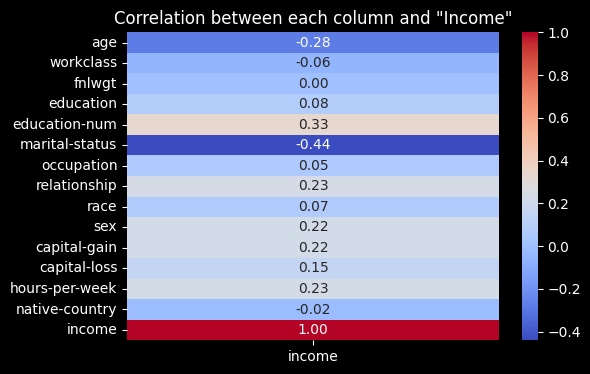

In [1271]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_data_cor.corr()

income_cor = correlation_matrix['income']

plt.figure(figsize=(6, 4))
sns.heatmap(income_cor.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()

## Preparing Data for Naive Bayes

### Gaussian Naive Bayes only Work with numeric values

so using label encoder to change strings to numaric values

In [1272]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_data['age'] = label_encoder.fit_transform(X_data['age'])
X_data['workclass'] = label_encoder.fit_transform(X_data['workclass'])
X_data['education'] = label_encoder.fit_transform(X_data['education'])
X_data['marital-status'] = label_encoder.fit_transform(X_data['marital-status'])
X_data['occupation'] = label_encoder.fit_transform(X_data['occupation'])
X_data['relationship'] = label_encoder.fit_transform(X_data['relationship'])
X_data['race'] = label_encoder.fit_transform(X_data['race'])
X_data['sex'] = label_encoder.fit_transform(X_data['sex'])
X_data['native-country'] = label_encoder.fit_transform(X_data['native-country'])

X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,0,77516,8,13,1,0,0,4,1,2174,0,40,3,<=50K
1,0,2,83311,8,13,0,3,3,4,1,0,0,13,3,<=50K
2,0,2,215646,10,9,1,5,0,4,1,0,0,40,3,<=50K
3,0,2,234721,1,7,0,5,3,2,1,0,0,40,3,<=50K
4,3,2,338409,8,13,0,9,3,2,0,0,0,40,3,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,2,245211,8,13,1,9,2,4,1,0,0,40,3,<=50K
48837,0,2,215419,8,13,1,9,0,4,0,0,0,36,3,<=50K
48839,0,2,374983,8,13,0,9,3,4,1,0,0,50,3,<=50K
48840,0,2,83891,8,13,1,0,2,1,1,5455,0,40,3,<=50K


In [1273]:
y_data = X_data['income']
X_data = X_data.drop((['income']), axis=1)

In [1274]:
X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,0,77516,8,13,1,0,0,4,1,2174,0,40,3
1,0,2,83311,8,13,0,3,3,4,1,0,0,13,3
2,0,2,215646,10,9,1,5,0,4,1,0,0,40,3
3,0,2,234721,1,7,0,5,3,2,1,0,0,40,3
4,3,2,338409,8,13,0,9,3,2,0,0,0,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,2,245211,8,13,1,9,2,4,1,0,0,40,3
48837,0,2,215419,8,13,1,9,0,4,0,0,0,36,3
48839,0,2,374983,8,13,0,9,3,4,1,0,0,50,3
48840,0,2,83891,8,13,1,0,2,1,1,5455,0,40,3


test_size = 0.2 means 20% of the data will be tested while 80% of the data will be trained

In [1275]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)

# Gaussian Naive Bayes

In [1276]:
from sklearn.naive_bayes import GaussianNB
g_nav_bay = GaussianNB()
g_nav_bay.fit(x_train,y_train)
y_prediction_g_nav_bay = g_nav_bay.predict(x_test)

In [1277]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction_g_nav_bay))

              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      6483
        >50K       0.66      0.31      0.42      2181

    accuracy                           0.79      8664
   macro avg       0.73      0.63      0.64      8664
weighted avg       0.77      0.79      0.76      8664



In [1278]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction_g_nav_bay)*100)

78.57802400738689


In [1279]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_prediction_g_nav_bay)

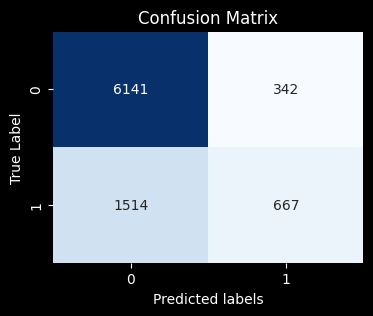

In [1280]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [1281]:
from sklearn.ensemble import RandomForestClassifier

ran_fo = RandomForestClassifier()

model = ran_fo.fit(x_train, y_train)
prediction_ran_fo = model.predict(x_test)

print("Accuracy training data : ", ran_fo.score(x_train, y_train))
print("Accuracy testing data : ", ran_fo.score(x_test, y_test))

Accuracy training data :  0.999365189289012
Accuracy testing data :  0.83898891966759


In [1282]:
print(classification_report(y_test, prediction_ran_fo))

              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      6483
        >50K       0.70      0.63      0.66      2181

    accuracy                           0.84      8664
   macro avg       0.79      0.77      0.78      8664
weighted avg       0.83      0.84      0.84      8664



In [1283]:
print(accuracy_score(y_test, prediction_ran_fo)*100)

83.89889196675901


In [1284]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction_ran_fo)

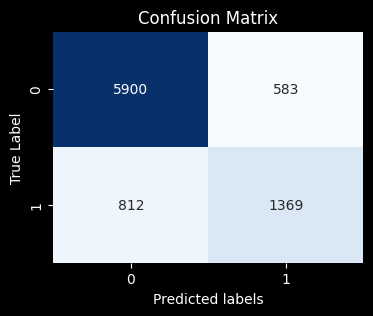

In [1285]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Handle outliers and group the datas



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix


# Precision-Recall Curve
precision_model1, recall_model1, _ = precision_recall_curve(true_labels, predictions_model1)
precision_model2, recall_model2, _ = precision_recall_curve(true_labels, predictions_model2)

plt.plot(recall_model1, precision_model1, label='Model 1')
plt.plot(recall_model2, precision_model2, label='Model 2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Example classification report
report = classification_report(y_test, y_prediction_gnb, output_dict=True)

# Extract F1 scores from the report
f1_scores = [report[label]['f1-score'] for label in report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Plot F1 scores
plt.bar(range(len(f1_scores)), f1_scores, color='blue')
plt.xlabel('Class Labels')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.xticks(np.arange(len(f1_scores)), report.keys(), rotation=45)
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()



